<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day26_YOLO_V3_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yolo V3 테스트 해보기!!

1. github에서 darknet을 다운
  - ! git clone '다크넷 주소' : 깃허브에서 다크넷 자료 다운
  - darknet : C와 CUDA로 작성된 오픈 소스 신경망 프레임 워크(다양한 오픈소스신경망 제공)

In [0]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10630 (delta 5), reused 10 (delta 5), pack-reused 10616
Receiving objects: 100% (10630/10630), 10.27 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (7179/7179), done.


In [0]:
# !ls
# %cd darknet
# !ls
# % cd ..

2. CUDA 다운로드(로컬에서만 필요, Colab에서는 필요X)
  - !wget 'cuda' : 웹 서버로부터 cuda 콘텐츠를 다운
  - dpkg : 데비안 패키지 관리 시스템의 기초가 되는 소프트웨어로 -i 옵션을 통해 다운된 cuda의 정보를 출력

In [0]:
#Installing CUDA pre-requisites
# !wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
# !dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

3. apt 업데이트(로컬에서만 필요, Colab에서는 필요X)
  - apt : Ubuntu 패키지 관리 도구
  - !apt update : 패키지 업데이트

In [0]:
# Advanced Package Tool update
# !apt update

In [0]:
#Installing CUDA
# !apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

# !apt --fix-broken install cuda-visual-tools-8-0 -y

4. os의 환경경로에 cuda 추가(로컬에서만 필요, Colab에서는 필요X)

In [0]:
# import os
# os.environ['PATH'] += ':/usr/local/cuda/bin'
# !ls /usr/local/cuda/bin

5. gcc-5와 g++-5 다운로드
  - gcc-5, g++-5 : darknet의 오픈소스 신경망을 컴파일하기 위한 컴파일러

In [0]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5

6. 다운로드한 컴파일러들을 링크

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

7. OPENCV와 GPU를 사용하기 위해 수정

In [0]:
#Changing the variables to include OpenCV and GPU in the Makefile
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [0]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
# !cat Makefile

8. opencv 라이브러리 다운로드(로컬에서만 필요, Colab에서는 필요X)

In [0]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
# !apt-get install libopencv-dev
# !apt autoremove

9. Makefile로 만들어둔 것들을 실행

In [0]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-Wun

10. 웹서버로부터 yolo-v3모델로 학습된 weight 값들을 다운(미리 학습된 값)

In [0]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-07-30 11:21:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  36.9MB/s    in 6.6s    

2019-07-30 11:21:20 (36.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



11. darknet 오픈소스 신경망 실행(객체 탐지)
  - detect : 사진의 객체 탐지
  - yolov3.cfg : yolov3에 사용될 conv layer, pooling layer 등 매 층 별 파라미터 사이즈들이 정의
  - yolov3.weights : 학습된 weight 값
  - dog/dog.jpg : 테스트 할 이미지 파일

In [0]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!ls
# %cd ./darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

3rdparty      CMakeLists.txt	      include		     scripts
appveyor.yml  darknet		      json_mjpeg_streams.sh  src
backup	      DarknetConfig.cmake.in  LICENSE		     video_v2.sh
build	      darknet.py	      Makefile		     video_yolov3.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     yolov3.weights
build.sh      data		      obj
cfg	      image_yolov2.sh	      README.md
cmake	      image_yolov3.sh	      results
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 con

In [0]:
# !ls

3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     video_v2.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
build.sh      data		      obj		     yolov3.weights
cfg	      image_yolov2.sh	      predictions.jpg
cmake	      image_yolov3.sh	      README.md


12. 원본 이미지 파일과 테스트 후 객체 감지가 된 이미지 파일 호출

(576, 768, 3)


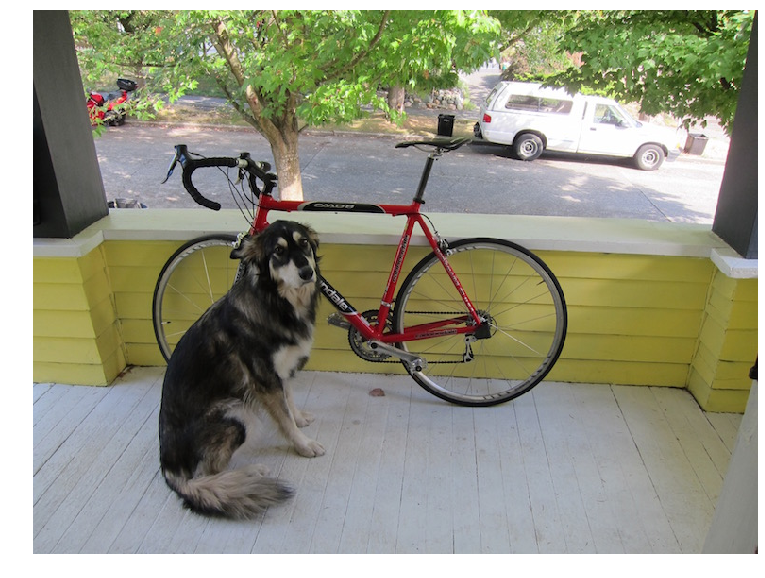

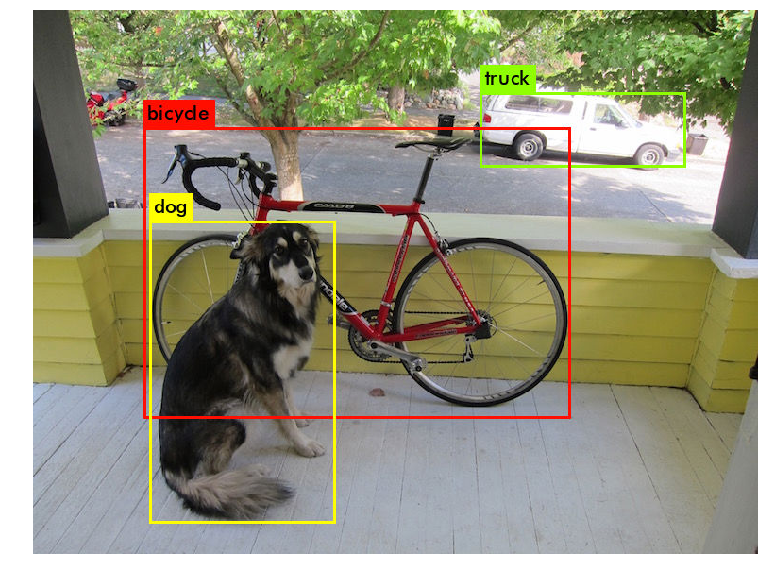

In [0]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("data/dog.jpg")
# print(image)
print(image.shape)
# height, width = image.shape[:2]
# # print(height)
# # print(width)
# resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
# print(resized_image.shape)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# fig = plt.gcf()
# fig.set_size_inches(18, 10)
# plt.axis("off")
# plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
# plt.show()



image = cv2.imread("predictions.jpg")
# height, width = image.shape[:2]
# resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
# !ls

3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     video_v2.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
build.sh      data		      obj		     yolov3.weights
cfg	      image_yolov2.sh	      predictions.jpg
cmake	      image_yolov3.sh	      README.md


In [0]:
# !cd data && ls

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [0]:
# # Upload the video you want to use for object detection
# # Please use a filename without spaces like test.mp4 etc.
# %cd
# %cd darknet
# !ls
# %cd data
# from google.colab import files
# uploaded = files.upload() 
# for name, data in uploaded.items():
#   with open(name, 'wb') as f:
#     f.write(data)
#     print ('saved file', name)

In [0]:
# !cd ../content && ls

/bin/bash: line 0: cd: ../content: No such file or directory


13. darknet 오픈소스 신경망 실행(동영상 파일의 객체 탐지)
  - detector : 객체 탐지
  - demo : 동영상 파일 테스트를 위한 커맨드
  - coco.data : coco.data 파일을 이용
  - yolov3.cfg : yolov3에 사용될 conv layer, pooling layer 등 매 층 별 파라미터 사이즈들이 정의
  - yolov3.weights : 학습된 weight 값
  - data/test.mp4 : 테스트 할 동영상 파일
  - out_filename test_output.mp4 : 테스트 결과 출력되는 동영상 파일

In [0]:
# %cd ../content
# %cd darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/test_ad.mp4 -i 0 -out_filename test_output.mp4
# %cd ../content
# %cd darknet
# !./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/test_ad.mp4 -i 0 -out_filename test_output.mp4 -thresh 0.8

Demo
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52

In [0]:
from google.colab import files

files.download('test_output.mp4')

In [0]:
# !./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -c 0

In [0]:
# !./darknet detector train data/obj.data cfg/yolov3-obj_r1.cfg backup/yolov3-obj_r1_8000.weights -dont_show -map | unbuffer -p tee log.txt

/bin/bash: unbuffer: command not found
Couldn't open file: data/obj.data


In [0]:
# !./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -c 0